In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from collections import Counter

In [2]:
iris = datasets.load_iris()
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [3]:
def most_common(lst):
    return max(set(lst), key=lst.count)

In [4]:
def euclidean_distance(point, data):
    return np.sqrt(np.sum(point - data)** 2)

In [6]:
class KNNClassifier:
    def __init__(self,k=5):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self,X,y):
        self.X_train = X
        self.y_train = y
    
    def _compute_distances(self, X_test):
        distances = []
        n_test = X_test.shape[0]
        n_train = self.X_train.shape[0]
        distances = np.zeros((n_test, n_train))
        for i in range(n_test):
            for j in range(n_train):
                distances[i,j] = np.sqrt(np.sum((X_test[i] - self.X_train[j]) ** 2))
        return distances

    def predict(self, X_test):
        distances = self._compute_distances(X_test)
        k_neighbours_indices = np.argsort(distances, axis=1)[:, :self.k]
        k_neighbours_labels = self.y_train[k_neighbours_indices]
        predictions = [Counter(neighbours).most_common(1)[0][0] for neighbours in k_neighbours_labels]
        return np.array(predictions)

    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        accuracy = np.mean(predictions == y_test)
        return accuracy
       

In [ ]:
knn_classifier = KNNClassifier()
knn_classifier.fit(X=X_train,y=y_train)
knn_classifier.score(X_test=X_test, y_test=y_test)

In [ ]:
from sklearn import neighbors

knn_classifier_sklearn = neighbors.KNeighborsClassifier()
knn_classifier_sklearn.fit(X=X_train, y=y_train)
knn_classifier_sklearn.score(X=X_test, y=y_test)
knn_classifier_sklearn_labels = knn_classifier_sklearn.predict(X_test)

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

breast_cancer = datasets.load_breast_cancer()
breast_cancer

In [12]:
X = breast_cancer['data']
y = breast_cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [ ]:
from algorithms import CustomKNNClassifier as KNNClassifier

knn_classifier = KNNClassifier(k=3)
knn_classifier.fit(X=X_train, y=y_train)
y_pred = knn_classifier.predict(X_test=X_test)

In [ ]:
knn_classifier.score(X_test=X_test, y_test=y_test)

In [14]:
import pandas as pd
from sklearn.metrics import confusion_matrix

In [ ]:
y_test, y_pred

In [16]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
confusion_matrix

In [18]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
gnb.score(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_gnb)

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_classifier = DecisionTreeClassifier()
dt_classifier = dt_classifier.fit(X_train,y_train)
y_pred_dt_classifier = dt_classifier.predict(X_test)

In [ ]:
plot_tree(dt_classifier)

In [ ]:
y_test, y_pred_dt_classifier

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle

from ucimlrepo import fetch_ucirepo

# Models Import
from algorithms import CustomKNNClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# KNN Classifier pre-requisites

k = 5
metric = 'euclidean'

In [3]:
dataset_dict = {
    0 : {
        'label' : 'd1',
        'name' : 'Breast Cancer',
        'data' : fetch_ucirepo(id=17)
    },
    1 : {
        'label' : 'd2',
        'name' : 'Wine Quality',
        'data' : fetch_ucirepo(id=186)
    },
    2 : {
        'label' : 'd3',
        'name' : 'iris',
        'data' : fetch_ucirepo(id=53)
    }
}

classifiers = {
    0 : {
        'label' : 'c1',
        'name' : 'CustomKNNClassifier',
        'model' : CustomKNNClassifier(k=k, metric=metric),
    },
    1 : {
        'label' : 'c2',
        'name' : 'KNeighboursClassifier',
        'model' : KNeighborsClassifier(n_neighbors=k, metric=metric)
    },
    2 : {
        'label' : 'c3',
        'name' : 'GaussianNB',
        'model' : GaussianNB()
    }
}

In [52]:
def weighted_data_split(X,y, test_size=0.2, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    X_train, X_test = [], []
    y_train, y_test = [], []

    classes = np.unique(y)
    # print(classes)

    for cls in classes:
        class_indices = np.where(y == cls)[0]
        class_samples = X[class_indices]
        class_labels = y[class_indices]

        # print(class_indices)

        class_samples, class_labels = shuffle(class_samples, class_labels, random_state=seed)
        split_idx = int(len(class_samples) * (1 - test_size))
        # print(split_idx)
        X_train.extend(class_samples[:split_idx])
        X_test.extend(class_samples[split_idx:])
        y_train.extend(class_labels[:split_idx])
        y_test.extend(class_labels[split_idx:])

    X_train, X_test = np.array(X_train) , np.array(X_test)
    y_train, y_test = np.array(y_train) , np.array(y_test)

    return X_train, X_test, y_train, y_test

In [ ]:
from collections import Counter

for _, dataset in dataset_dict.items():
    X = dataset['data'].data.features.to_numpy()
    y = dataset['data'].data.targets.to_numpy().flatten()

    print(Counter(y))

    X_train, X_test, y_train, y_test = weighted_data_split(X, y, test_size=0.3)
    print(Counter(y_train.tolist()), Counter(y_test.tolist()))
    # print(Counter(X_test), Counter(y_test))

In [ ]:
from collections import Counter

for _, dataset in dataset_dict.items():
    X = dataset['data'].data.features.to_numpy()
    y = dataset['data'].data.targets.to_numpy().flatten()

    print(Counter(y))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
    print(Counter(y_train.tolist()), Counter(y_test.tolist()))

In [ ]:
for _, dataset in dataset_dict.items():
    X = dataset['data'].data.features.to_numpy()
    y = dataset['data'].data.targets.to_numpy().flatten()

    # print(X[0], y[0])
    # print(type(X), type(y))
    # print(X.shape, y.shape)
    X_train, X_test, y_train, y_test = weighted_data_split(X, y, test_size=0.2)

    for _ , classifer in classifiers.items():

        model = classifer['model']

        start_train = time.time()
        model = model.fit(X_train, y_train)
        train_time = time.time() - start_train

        start_predict = time.time()
        y_pred = model.predict(X_test)
        predict_time = time.time() - start_predict

        accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
        conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
        
        df = pd.DataFrame(conf_matrix,
                          index=[f'Actual_{i}' for i in range(conf_matrix.shape[0])],
                          columns=[f'Predicted_{i}' for i in range(conf_matrix.shape[1])])
        
        df.to_csv(f'results/g018_{dataset['label']}_{classifer['label']}.csv')

        print('Model - ', classifer['name'], ' | Dataset - ', dataset['name'])
        print('Accuracy - ', accuracy)
        print('Training time - ', train_time)
        print('Prediction time - ', predict_time)
        print(f'Confusion Matrix - ', conf_matrix)
        print('-' * 50)

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler

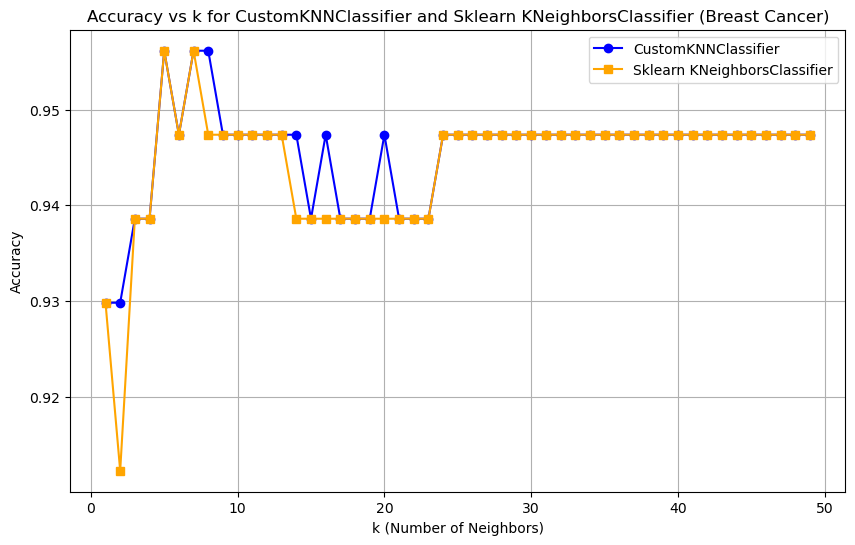

Optimal k for CustomKNNClassifier: 5, Accuracy: 0.9561
Optimal k for Sklearn KNeighborsClassifier: 5, Accuracy: 0.9561


In [16]:
# Load the Breast Cancer
data = fetch_ucirepo(id=17)
X = data.data.features.to_numpy()
y = data.data.targets.to_numpy().flatten()

# Standardize the data
sc = StandardScaler()
X = sc.fit_transform(X)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Range of k values to test
k_range = range(1, 50)

# Store cross-validation scores
custom_accuracies = []
sklearn_accuracies = []

# Perform cross-validation for each k for both classifiers
for k in k_range:
    # CustomKNNClassifier
    custom_knn = CustomKNNClassifier(k=k)
    custom_knn.fit(X_train, y_train)
    custom_y_pred = custom_knn.predict(X_test)
    custom_acc = accuracy_score(y_true=y_test, y_pred=custom_y_pred)
    custom_accuracies.append(custom_acc)

    # Sklearn KNeighborsClassifier
    sklearn_knn = KNeighborsClassifier(n_neighbors=k)
    sklearn_knn.fit(X_train, y_train)
    sklearn_y_pred = sklearn_knn.predict(X_test)
    sklearn_acc = accuracy_score(y_true=y_test, y_pred=sklearn_y_pred)
    sklearn_accuracies.append(sklearn_acc)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, custom_accuracies, marker='o', label='CustomKNNClassifier', color='blue')
plt.plot(k_range, sklearn_accuracies, marker='s', label='Sklearn KNeighborsClassifier', color='orange')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k for CustomKNNClassifier and Sklearn KNeighborsClassifier (Breast Cancer)')
plt.legend()
plt.grid()
plt.show()

# Find the optimal k for each classifier
optimal_k_custom = k_range[np.argmax(custom_accuracies)]
optimal_k_sklearn = k_range[np.argmax(sklearn_accuracies)]
print(f"Optimal k for CustomKNNClassifier: {optimal_k_custom}, Accuracy: {max(custom_accuracies):.4f}")
print(f"Optimal k for Sklearn KNeighborsClassifier: {optimal_k_sklearn}, Accuracy: {max(sklearn_accuracies):.4f}")


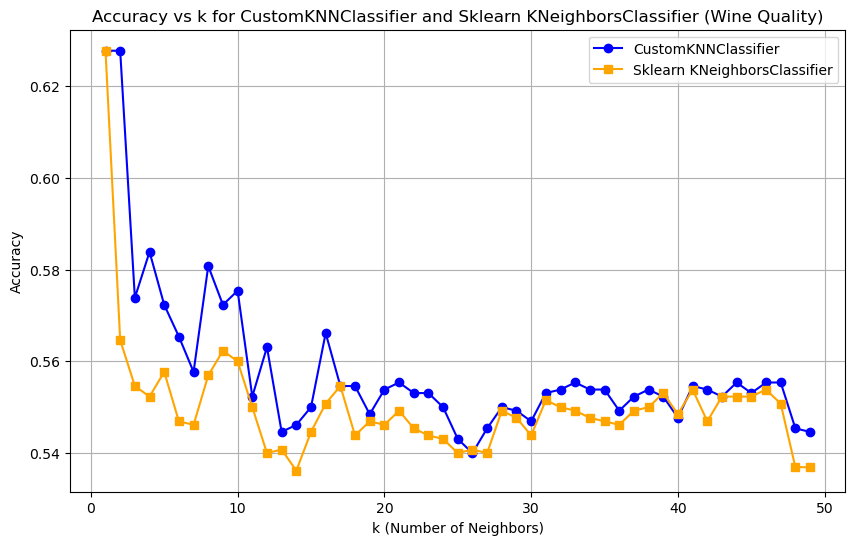

Optimal k for CustomKNNClassifier: 1, Accuracy: 0.6277
Optimal k for Sklearn KNeighborsClassifier: 1, Accuracy: 0.6277


In [15]:
# Load the Wine Quality dataset
data = fetch_ucirepo(id=186)
X = data.data.features.to_numpy()
y = data.data.targets.to_numpy().flatten()

# Standardize the data
sc = StandardScaler()
X = sc.fit_transform(X)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Range of k values to test
k_range = range(1, 50)

# Store cross-validation scores
custom_accuracies = []
sklearn_accuracies = []

# Perform cross-validation for each k for both classifiers
for k in k_range:
    # CustomKNNClassifier
    custom_knn = CustomKNNClassifier(k=k)
    custom_knn.fit(X_train, y_train)
    custom_y_pred = custom_knn.predict(X_test)
    custom_acc = accuracy_score(y_true=y_test, y_pred=custom_y_pred)
    custom_accuracies.append(custom_acc)

    # Sklearn KNeighborsClassifier
    sklearn_knn = KNeighborsClassifier(n_neighbors=k)
    sklearn_knn.fit(X_train, y_train)
    sklearn_y_pred = sklearn_knn.predict(X_test)
    sklearn_acc = accuracy_score(y_true=y_test, y_pred=sklearn_y_pred)
    sklearn_accuracies.append(sklearn_acc)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, custom_accuracies, marker='o', label='CustomKNNClassifier', color='blue')
plt.plot(k_range, sklearn_accuracies, marker='s', label='Sklearn KNeighborsClassifier', color='orange')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k for CustomKNNClassifier and Sklearn KNeighborsClassifier (Wine Quality)')
plt.legend()
plt.grid()
plt.show()

# Find the optimal k for each classifier
optimal_k_custom = k_range[np.argmax(custom_accuracies)]
optimal_k_sklearn = k_range[np.argmax(sklearn_accuracies)]
print(f"Optimal k for CustomKNNClassifier: {optimal_k_custom}, Accuracy: {max(custom_accuracies):.4f}")
print(f"Optimal k for Sklearn KNeighborsClassifier: {optimal_k_sklearn}, Accuracy: {max(sklearn_accuracies):.4f}")


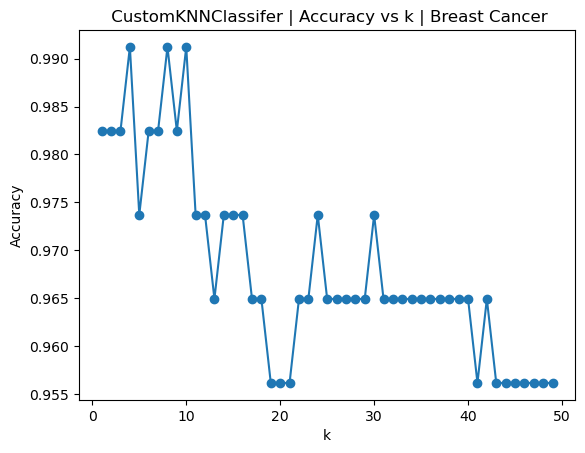

Optimal k: 4


In [12]:
# Load the Breast Cancer
data = fetch_ucirepo(id=17)
X = data.data.features.to_numpy()
y = data.data.targets.to_numpy().flatten()

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y)

# Range of k values to test
k_range = range(1, 50)

# Store cross-validation scores
accuracies = []

# Perform cross-validation for each k
for k in k_range:
    # knn = KNeighborsClassifier(n_neighbors=k)
    knn = CustomKNNClassifier(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    accuracies.append(acc)

# Plot the results
plt.plot(k_range, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
# plt.title(f' KNeighbourClassifer | Accuracy vs k | Breast Cancer')
plt.title(f' CustomKNNClassifer | Accuracy vs k | Breast Cancer')
plt.show()

# Find the optimal k
optimal_k = k_range[np.argmax(accuracies)]
print(f"Optimal k: {optimal_k}")


In [13]:
# Load the Wine Quality dataset
data = fetch_ucirepo(id=186)
X = data.data.features.to_numpy()
y = data.data.targets.to_numpy().flatten()

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y)

# Range of k values to test
k_range = range(1, 50)

# Store cross-validation scores
accuracies = []

# Perform cross-validation for each k
for k in k_range:
    # knn = KNeighborsClassifier(n_neighbors=k)
    knn = CustomKNNClassifier(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    accuracies.append(acc)

# Plot the results
plt.plot(k_range, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
# plt.title(f' KNeighbourClassifer | Accuracy vs k | Wine Quality')
plt.title(f' CustomKNNClassifer | Accuracy vs k | Wine Quality')
plt.show()

# Find the optimal k
optimal_k = k_range[np.argmax(accuracies)]
print(f"Optimal k: {optimal_k}")


KeyboardInterrupt: 